1.Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
transaction_data = pd.read_csv("/home/jupyter-v-scherbak-20/shared/homeworks/python_ds_miniprojects/5/transaction_data.csv")

In [4]:
transaction_data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [5]:
transaction_data.shape #кол-во строк и столбцов

(5315, 3)

In [9]:
transaction_data.dtypes #типы данных в колонках

date           object
name           object
transaction    object
dtype: object

In [10]:
transaction_data.describe() #описательная статистика

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [13]:
transaction_data.isna().sum() #кол-во пропущенных значений

date           0
name           0
transaction    0
dtype: int64

2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

In [15]:
transaction_data.transaction.unique() #уникальные значения в колонке

array(['cancelled', 'successfull', 'error'], dtype=object)

In [24]:
count_transaction_df = transaction_data.groupby("transaction", as_index=False) \
                .agg({"date": "count"}) \
                .sort_values("date", ascending=False) \
                .rename(columns={"date": "count_transaction"})
count_transaction_df #вычисляем кол-во наблюдений для каждого типа транзакции

,transaction,count_transaction
2,successfull,3692
0,cancelled,1619
1,error,4


3. Сколько транзакций завершились ошибкой?

In [28]:
transaction_data.transaction.value_counts() #более простой вариант для вычисения кол-ва наблюдений

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

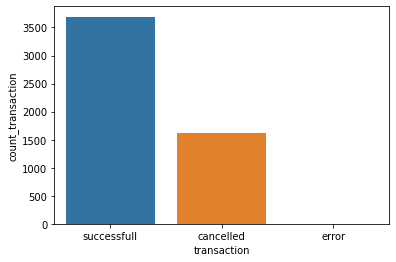

In [26]:
sns.barplot(x="transaction", y="count_transaction", data=count_transaction_df) #строим график барплот

4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


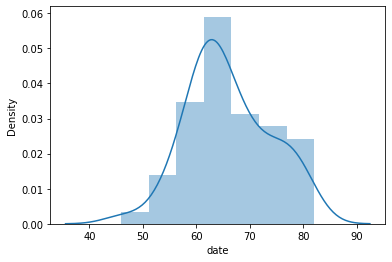

In [63]:
df_3 = transaction_data.query("transaction == 'successfull'") \
                .groupby("name", as_index=False) \
                .agg({"date": "count"}) \
                .sort_values("date") \
                #.describe()

sns.distplot(df_3.date)

In [64]:
df_2 = transaction_data.query("transaction == 'successfull'").name.value_counts(normalize=True)

5. Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [93]:
df = pd.read_csv("/home/jupyter-v-scherbak-20/transaction_data_updated.csv")
#, parse_dates=["date"]

In [81]:
user_vs_minute_pivot = df.groupby(["name", "minute"], as_index=False) \
    .agg({"date": "count"}) \
    .pivot(index="minute", columns="name", values="date") \
    .fillna(0)

6. Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
7. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

In [97]:
df.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [96]:
df.date = df.date.astype('datetime64[ns]')
#df.date = pd.to_datetime(df.date)

In [101]:
df["true_minute"] = df.date.dt.minute + df.date.dt.hour*60

In [102]:
df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


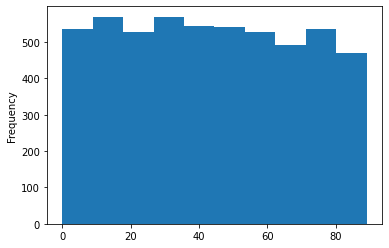

In [107]:
df.true_minute.plot.hist()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


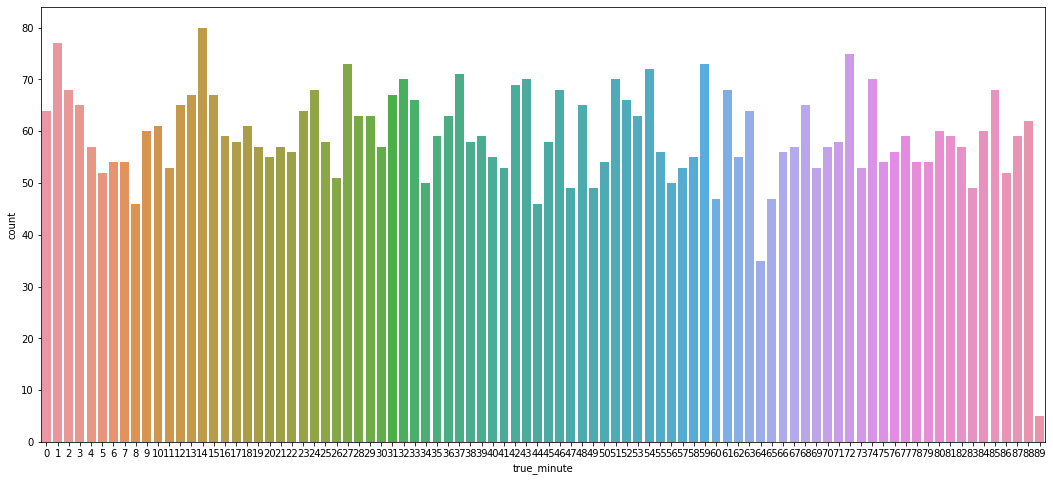

In [112]:
plt.figure(figsize=(18, 8))
sns.countplot(df.true_minute)